In [70]:
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Compare the SVF hist of Shanghai

In [12]:
# Load the data
sf_svf_ref = rio.open(r"I:\BH_DataBase\tif\sh_1m_ref_svf_fill.tif")
sf_svf_ref_data = sf_svf_ref.read(1).flatten()
sf_svf = rio.open(r"I:\BH_DataBase\tif\sh_1m_mask2_svf_fill.tif")
sf_svf_data = sf_svf.read(1).flatten()
sf_svf_CNBH = rio.open(r"I:\BH_DataBase\tif\CNBH_mosaic_svf_fill.tif")
sf_svf_CNBH_data = sf_svf_CNBH.read(1).flatten()

In [17]:
# range of the data
print(f"Reference SVF: {sf_svf_ref_data.min()} - {sf_svf_ref_data.max()}")
print(f"Predicted SVF: {sf_svf_data.min()} - {sf_svf_data.max()}")
print(f"CNBH SVF: {sf_svf_CNBH_data.min()} - {sf_svf_CNBH_data.max()}")

Reference SVF: 0.0 - 1.0
Predicted SVF: 0.0 - 1.0
CNBH SVF: -3.4028234663852886e+38 - 0.9999999403953552


In [18]:
# delete the minus values
sf_svf_CNBH_data = sf_svf_CNBH_data[sf_svf_CNBH_data > 0]

C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

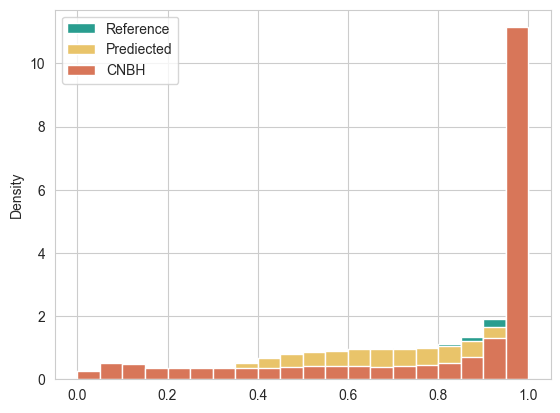

In [41]:
# Compare three hist of svf data in a single ax
fig, ax = plt.subplots()
sns.histplot(sf_svf_ref_data, bins=20, ax=ax, alpha=1,color='#299D8F', label='Reference',stat='density')
sns.histplot(sf_svf_data, bins=20, ax=ax, alpha=1,color='#E9C46A', label='Prediected',stat='density')
sns.histplot(sf_svf_CNBH_data, bins=20, ax=ax, alpha=1,color='#D87659', label='CNBH',stat='density')
# legend
plt.legend()

(array([  472785.,   272214.,   288700.,   324202.,   344331.,   336866.,
          326057.,   311823.,   304195.,   301884.,   307525.,   330614.,
          355925.,   386034.,   432415.,   499056.,   581727.,   666396.,
          750369.,   826180.,   888368.,   959311.,  1032774.,  1093227.,
         1168557.,  1205890.,  1211269.,  1247723.,  1281292.,  1315758.,
         1356354.,  1365327.,  1363693.,  1367323.,  1382431.,  1396243.,
         1415496.,  1429457.,  1446719.,  1485170.,  1531035.,  1619928.,
         1715499.,  1857352.,  2002289.,  2309639.,  2815243.,  3601494.,
         5395754., 14050335.]),
 array([0.        , 0.02      , 0.04      , 0.06      , 0.08      ,
        0.1       , 0.12      , 0.14      , 0.16      , 0.18000001,
        0.2       , 0.22      , 0.23999999, 0.25999999, 0.28      ,
        0.30000001, 0.31999999, 0.34      , 0.36000001, 0.38      ,
        0.40000001, 0.41999999, 0.44      , 0.46000001, 0.47999999,
        0.5       , 0.51999998, 0.54

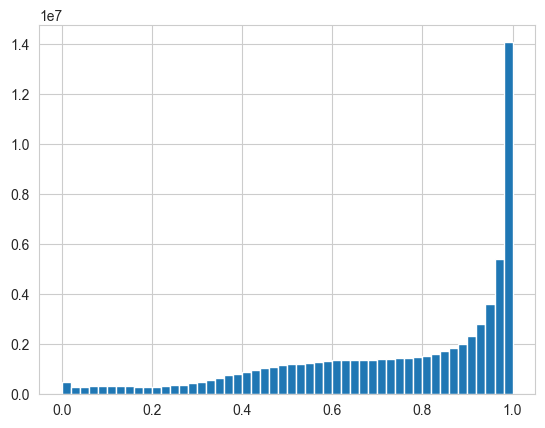

In [7]:
# histogram of the data
plt.hist(sf_svf_ref_data, bins=50)

C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

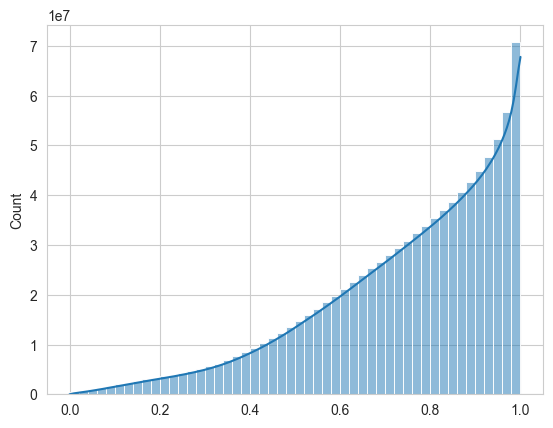

In [10]:
sns.histplot(sf_svf_ref_data, bins=50, cumulative=True)

C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Miniconda3\envs\momepy_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

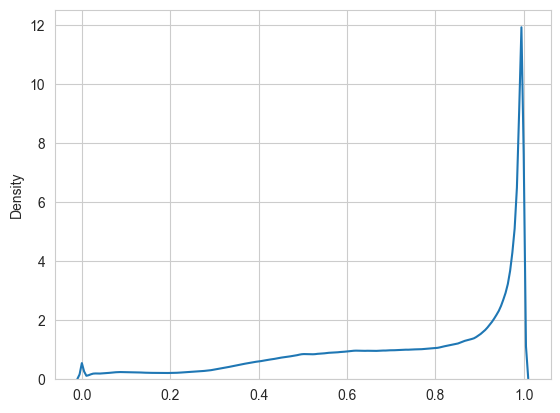

In [9]:
sns.kdeplot(sf_svf_ref_data, bw_adjust=0.5)

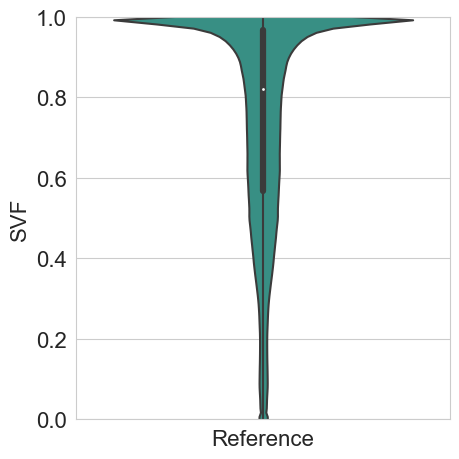

In [109]:
# violin plot of the reference svf data
fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
sns.violinplot(data=sf_svf_ref_data,palette=['#299D8F'],ax=ax)
plt.ylim(0,1)
plt.ylabel('SVF')
plt.xticks([0],['Reference'])
plt.savefig(r"H:\BaiduSyncdisk\@manuscript\BuildingHeight\sh_svf_hist_ref.png",dpi=300)

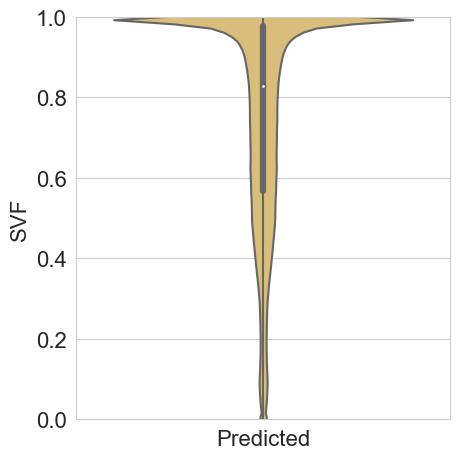

In [110]:
# violin plot of the predicted svf data
fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
sns.violinplot(data=sf_svf_data,palette=['#E9C46A'],ax=ax)
plt.ylim(0,1)
plt.ylabel('SVF')
plt.xticks([0],['Predicted'])
plt.savefig(r"H:\BaiduSyncdisk\@manuscript\BuildingHeight\sh_svf_hist_pred.png",dpi=300)

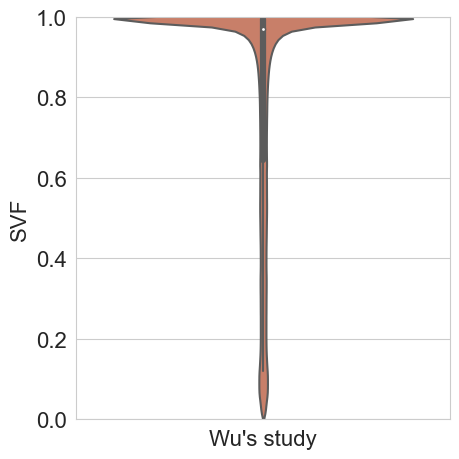

In [111]:
# violin plot of the CNBH svf data
fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
sns.violinplot(data=sf_svf_CNBH_data,palette=['#D87659'],ax=ax)
plt.ylim(0,1)
plt.ylabel('SVF')
plt.xticks([0],[r"Wu's study"])
plt.savefig(r"H:\BaiduSyncdisk\@manuscript\BuildingHeight\sh_svf_hist_CNBH.png",dpi=300)

## compare the building height histogram of whole Shanghai

In [21]:
sh_bulidings = gpd.read_file(r"I:\BH_DataBase\DataHist\SH.shp")
CNBH_bulidings = rio.open(r"I:\BH_DataBase\DataHist\CNBH_SH_mask.tif")

In [26]:
CNBH_bulidings_data = CNBH_bulidings.read(1).flatten()

In [46]:
CNBH_bulidings_data = CNBH_bulidings_data[CNBH_bulidings_data > 0]

In [24]:
sh_bulidings.head()

,block_area,block_ar_1,block_ar_2,block_ndsm,block_nd_1,block_nd_2,block_nd_3,block_peri,block_pe_1,block_pe_2,...,buildin_33,building_s,buildin_34,buildin_35,buildin_36,city,pred,residual,residual_a,geometry
0,417925.439522,206458.593397,196038.991728,38.98,9.367105,0.0,8.513897,2726.713142,1980.107914,1896.163203,...,171.362150,233.688354,187.236311,162.405765,208.128267,sh,16.77,1.23,1.23,"POLYGON ((13513324.229 3648505.375, 13513324.2..."
1,417925.439522,206458.593397,196038.991728,38.98,9.367105,0.0,8.513897,2726.713142,1980.107914,1896.163203,...,183.862124,233.696042,205.107678,174.566770,233.697032,sh,17.41,0.59,0.59,"POLYGON ((13513231.098 3648505.403, 13513231.0..."
2,417925.439522,206458.593397,196038.991728,38.98,9.367105,0.0,8.513897,2726.713142,1980.107914,1896.163203,...,103.483429,106.531877,109.939891,111.523122,106.531877,sh,6.56,-0.56,0.56,"POLYGON ((13512961.279 3648492.375, 13512958.8..."
3,417925.439522,206458.593397,196038.991728,38.98,9.367105,0.0,8.513897,2726.713142,1980.107914,1896.163203,...,161.835568,213.162543,137.081438,148.371655,183.779348,sh,17.05,0.95,0.95,"POLYGON ((13513678.879 3648507.693, 13513678.8..."
4,417925.439522,206458.593397,196038.991728,38.98,9.367105,0.0,8.513897,2726.713142,1980.107914,1896.163203,...,112.241955,105.244556,173.599247,139.180582,105.244556,sh,18.20,-0.20,0.20,"POLYGON ((13513595.286 3648507.704, 13513595.2..."


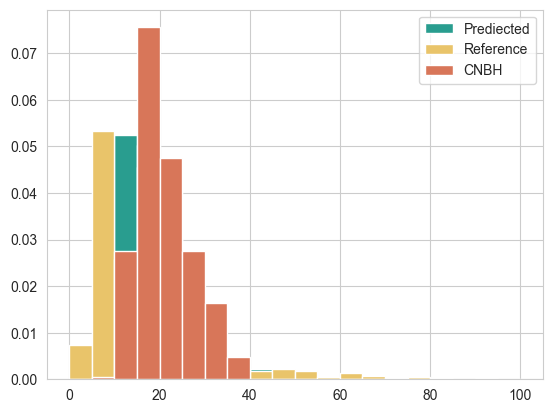

In [71]:
# histogram of the building height

plt.hist(sh_bulidings['pred'], bins=20,range=(0,100),density=True,alpha=1,color='#299D8F', label='Prediected',stacked=True)
plt.hist(sh_bulidings['building_h'], bins=20,range=(0,100),density=True,alpha=1,color='#E9C46A', label='Reference',stacked=True)
plt.hist(CNBH_bulidings_data, bins=20,range=(0,100),density=True,alpha=1,color='#D87659', label='CNBH',stacked=True)
plt.legend()

(array([[3.42123715e-04, 2.47884553e-03, 1.19743300e-03, 2.33428478e-03,
         1.98046192e-03, 1.71468785e-04, 1.64754492e-04, 1.78386540e-04,
         8.26061424e-05, 1.06563958e-04, 7.89946670e-05, 2.05498039e-05,
         5.93095825e-05, 2.99091205e-05, 1.41915725e-05, 2.42630110e-05,
         1.33777189e-05, 4.06926810e-06, 9.20671907e-06, 1.72943894e-06],
        [4.56114088e-04, 4.66617886e-03, 3.63207611e-03, 4.45208450e-03,
         3.55002949e-03, 3.98228749e-04, 3.50313117e-04, 3.35714618e-04,
         1.87084601e-04, 1.78742601e-04, 1.25689518e-04, 4.81190953e-05,
         8.03680450e-05, 4.34903028e-05, 2.31948282e-05, 2.82305474e-05,
         1.56666822e-05, 4.73052416e-06, 9.41018248e-06, 2.03463405e-06],
        [4.56114088e-04, 5.15688173e-03, 2.85248573e-02, 7.30104522e-02,
         4.66670787e-02, 2.54482362e-02, 1.52068549e-02, 4.74008694e-03,
         2.29761050e-04, 1.78742601e-04, 1.25689518e-04, 4.81190953e-05,
         8.03680450e-05, 4.34903028e-05, 2.319482

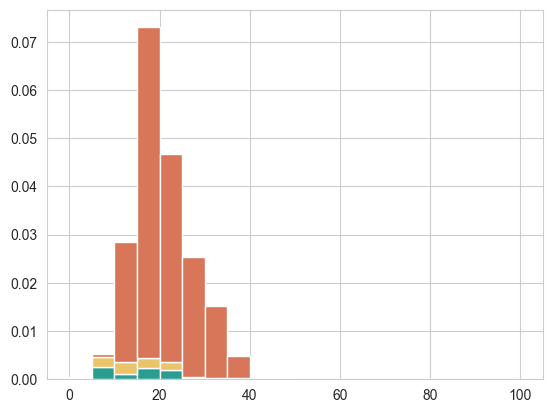

In [72]:
plt.hist([sh_bulidings['building_h'],sh_bulidings['pred'],CNBH_bulidings_data], bins=20,range=(0,100),density=True,alpha=1,color=['#299D8F','#E9C46A','#D87659'], label=['Reference','Predicted','CNBH'],stacked=True)

Text(0.5, 0, '')

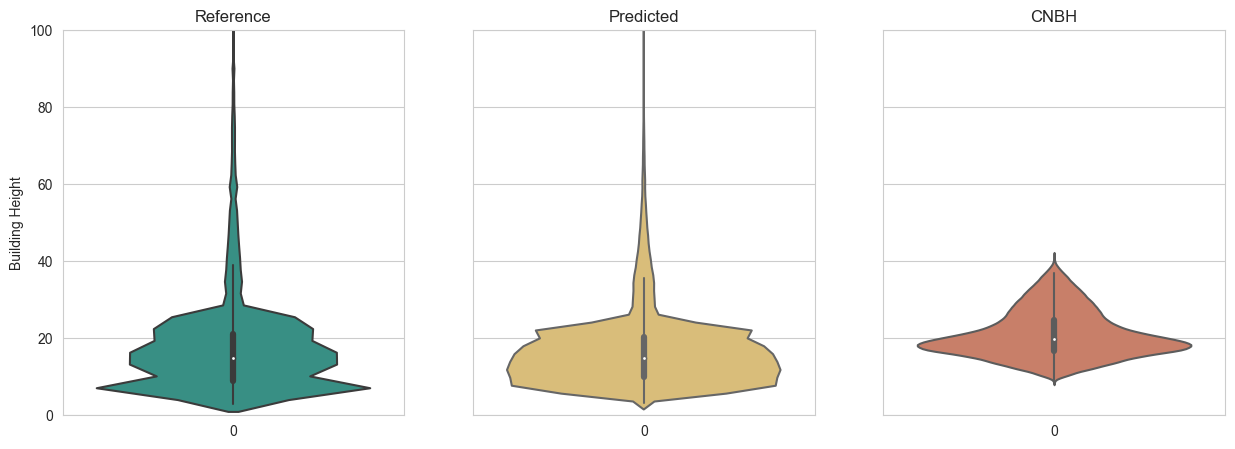

In [53]:
# violin plot of the building height in three figures
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
sns.violinplot(data=sh_bulidings['building_h'], ax=ax[0], color='#299D8F')
ax[0].set_ylim(0,100)
ax[0].set_title('Reference')
ax[0].set_ylabel('Building Height')
ax[0].set_xlabel('')
sns.violinplot(data=sh_bulidings['pred'], ax=ax[1], color='#E9C46A')
ax[1].set_ylim(0,100)
ax[1].set_title('Predicted')
ax[0].set_xlabel('')
sns.violinplot(data=CNBH_bulidings_data, ax=ax[2], color='#D87659')
ax[2].set_ylim(0,100)
ax[2].set_title('CNBH')
ax[0].set_xlabel('')

In [64]:
# violin plot of the building height in a single figure
fig, ax = plt.subplots()
sns.violinplot(data=[sh_bulidings['building_h'],sh_bulidings['pred'],CNBH_bulidings_data],palette=['#299D8F','#E9C46A','#D87659'],ax=ax)
plt.ylim(0,100)
plt.ylabel('Building Height')
plt.xticks([0,1,2],['Reference','Predicted','CNBH'])
plt.show()

TypeError: cannot unpack non-iterable Axes object

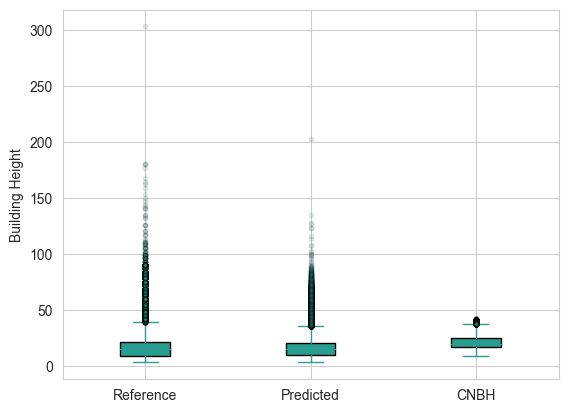

In [80]:
fig, ax = plt.subplots()
ax.boxplot([sh_bulidings['building_h'], sh_bulidings['pred'], CNBH_bulidings_data], labels=['Reference','Predicted','CNBH'],patch_artist=True,boxprops=dict(facecolor='#299D8F'),whiskerprops=dict(color='#299D8F'),capprops=dict(color='#299D8F'),flierprops=dict(markerfacecolor='#299D8F', marker='o', markersize=3, linestyle='none',alpha=0.1),medianprops=dict(color='#299D8F'))
plt.ylabel('Building Height')
plt.show()

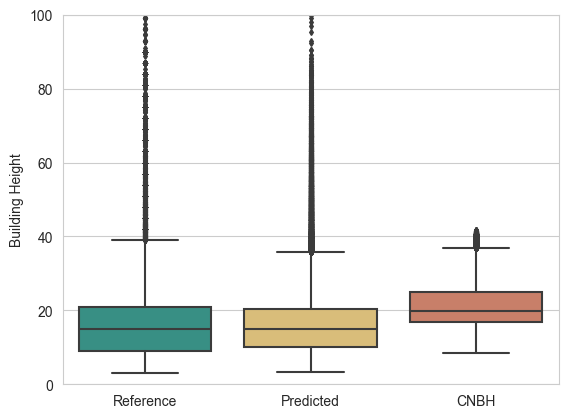

In [82]:
fig, ax = plt.subplots()
# set dot size and alpha

sns.boxplot(data=[sh_bulidings['building_h'],sh_bulidings['pred'],CNBH_bulidings_data],palette=['#299D8F','#E9C46A','#D87659'],fliersize=3,ax=ax)

plt.ylim(0,100)
plt.ylabel('Building Height')
plt.xticks([0,1,2],['Reference','Predicted','CNBH'])
plt.show()

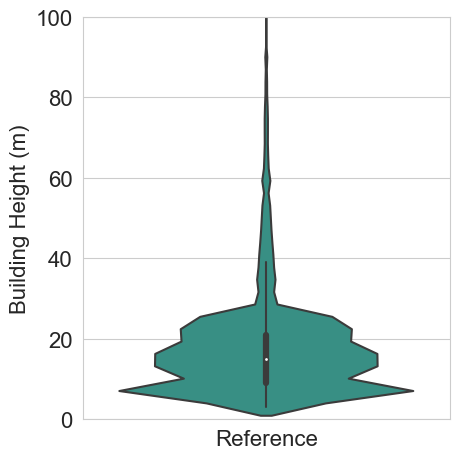

In [118]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 20,'axes.labelsize': 16,'axes.titlesize': 20,'xtick.labelsize': 16,'ytick.labelsize': 16,'legend.fontsize': 16})
fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
# set font
# plot reference boxplot
sns.violinplot(data=sh_bulidings['building_h'],palette=['#299D8F'],ax=ax)
# set fliteralpha to 0.1
for artist in ax.artists:
    artist.set_alpha(0.05)
    artist.set_edgecolor('grey')
    artist.set_linewidth(0.1)
plt.ylim(0,100)
plt.ylabel('Building Height (m)')
plt.xticks([0],['Reference'])
plt.savefig(r"H:\BaiduSyncdisk\@manuscript\BuildingHeight\sh_building_hist_ref.png",dpi=300)

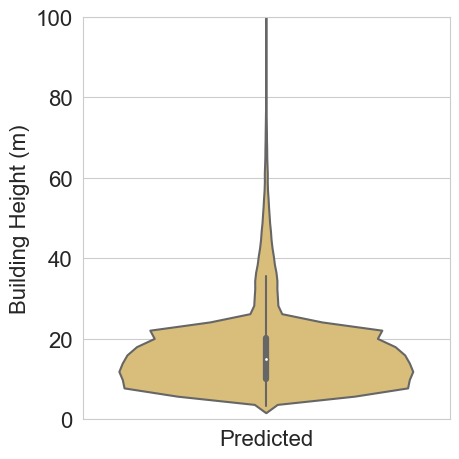

In [119]:
fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
# plot reference boxplot
sns.violinplot(data=sh_bulidings['pred'],palette=['#E9C46A'],ax=ax)
# set fliteralpha to 0.1
for artist in ax.artists:
    artist.set_alpha(0.05)
    artist.set_edgecolor('grey')
    artist.set_linewidth(0.1)
plt.ylim(0,100)
plt.ylabel('Building Height (m)')
plt.xticks([0],['Predicted'])
plt.savefig(r"H:\BaiduSyncdisk\@manuscript\BuildingHeight\sh_building_hist_pred.png",dpi=300)

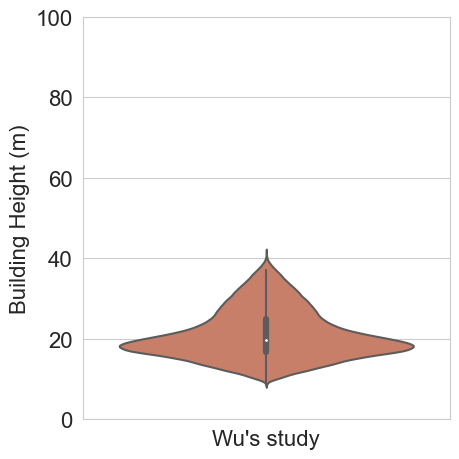

In [120]:
fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
# plot reference boxplot
sns.violinplot(data=CNBH_bulidings_data,palette=['#D87659'],ax=ax)
# set fliteralpha to 0.1
for artist in ax.artists:
    artist.set_alpha(0.05)
    artist.set_edgecolor('grey')
    artist.set_linewidth(0.1)
plt.ylim(0,100)
plt.ylabel('Building Height (m)')
plt.xticks([0],[r"Wu's study"])
plt.savefig(r"H:\BaiduSyncdisk\@manuscript\BuildingHeight\sh_building_hist_CNBH.png",dpi=300)

## building height hist in mask 2

In [112]:
sh_bulidings_mask2 = gpd.read_file(r"I:\BH_DataBase\DataHist\SH_mask2.shp")
CNBH_builidngs_mask2 = rio.open(r"I:\BH_DataBase\DataHist\CNBH_SH_mask2.tif")

In [113]:
CNBH_builidngs_mask2_data = CNBH_builidngs_mask2.read(1).flatten()

In [114]:
CNBH_builidngs_mask2_data = CNBH_builidngs_mask2_data[CNBH_builidngs_mask2_data > 0]   

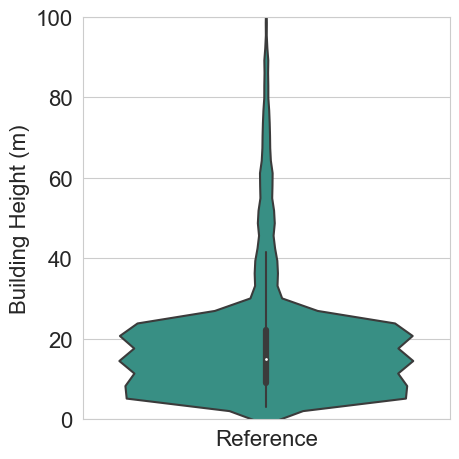

In [121]:
# violin plot of the building height in a single figure
fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
sns.violinplot(data=[sh_bulidings_mask2['building_h']],palette=['#299D8F'],ax=ax)
plt.ylim(0,100)
plt.ylabel('Building Height (m)')
plt.xticks([0],['Reference'])
plt.savefig(r"H:\BaiduSyncdisk\@manuscript\BuildingHeight\sh_building_hist_ref_mask2.png",dpi=300)

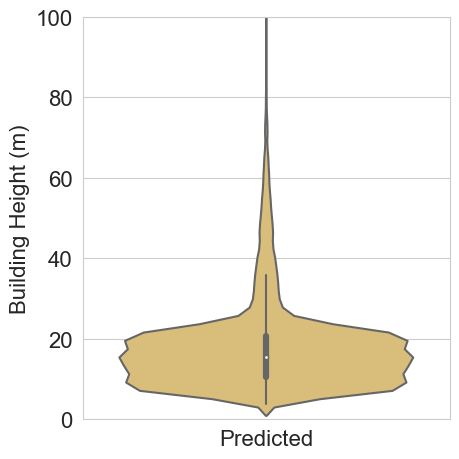

In [122]:
fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
sns.violinplot(data=[sh_bulidings_mask2['pred']],palette=['#E9C46A'],ax=ax)
plt.ylim(0,100)
plt.ylabel('Building Height (m)')
plt.xticks([0],['Predicted'])
plt.savefig(r"H:\BaiduSyncdisk\@manuscript\BuildingHeight\sh_building_hist_pred_mask2.png",dpi=300)

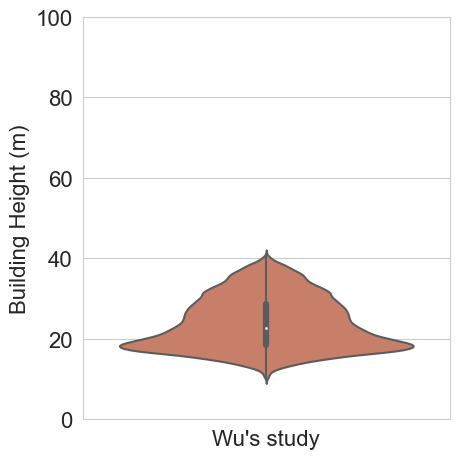

In [123]:
fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
sns.violinplot(data=[CNBH_builidngs_mask2_data],palette=['#D87659'],ax=ax)
plt.ylim(0,100)
plt.ylabel('Building Height (m)')
plt.xticks([0],[r"Wu's study"])
plt.savefig(r"H:\BaiduSyncdisk\@manuscript\BuildingHeight\sh_building_hist_CNBH_mask2.png",dpi=300)